### Consigna N°2
Una empresa de internet está investigando distintas zonas por las afueras de una ciudad a fin de decidir si extender su servicio hacia estas zonas, por lo que se encarga de averiguar la cantidad de personas que hay. De estas personas se sabe las edades de las mismas (solo personas adultas), sus ingresos, sus gastos generales, si tiene familar/es a cargo, la accesibilidad a calle asfaltada, presencia de otra empresa de internet cercana, entre algunas otras cosas. La idea de esta empresa es realizar una oferta limitada en estas zonas, dándoles en principio el acceso de hasta 3 posibles velocidades de internet.

Dado el [siguiente dataset](https://raw.githubusercontent.com/FundamentosInformaticaUCEMA/FI_Parcial2_2022_T1/main/recursos/internet.csv?token=GHSAT0AAAAAABTQD3IXNKY7XLI74SXU6ZB2YWCJHAQ) ([link alternativo para descargar](https://ucema.edu.ar/webcampus3/mod/resource/view.php?id=66874)), responder las siguientes preguntas:

a) Cargá los datos en un data frame, inspeccionalo y caracterizalo.

b) ¿Cuáles son las variables que se encuentran relacionadas? ¿Cómo lo evaluarías gráficamente?

c) Usando un k=3 realizá el agrupamiento de los datos. Analizar y evaluar si el proceso de clustering fue correcto. 

d) Proponer un número de clusters (k) más apropiado, validarlo de forma gráfica. 

e) ¿Qué conclusión podés sacar de [este gráfico del codo](https://github.com/FundamentosInformaticaUCEMA/FI_Parcial2_2022_T1/blob/main/recursos/codo.jpg)?


a) Cargá los datos en un data frame, inspeccionalo y caracterizalo.


ACA SOLO CARGO EL DF, DESPUES LO CARACTERIZO Y INSPECCIONO DEBAJO DEL PUNTO B

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import numpy as np
from scipy import stats

In [4]:
#cargo el df
internet=pd.read_csv("internet.csv")

In [5]:
internet.head()

,ID,Nombre,Apellido,Ingreso,Gastos generales,Familiares a cargo,Accesibilidad a calle asfaltada,Otra empresa
0,1,Filia,Murrthum,26.50,15.75,False,False,False
1,2,Neysa,Attarge,723.06,475.84,True,True,False
2,3,Ervin,Keggin,692.55,410.67,False,True,True
3,4,Stacee,Foggo,815.42,403.88,True,True,True
4,5,Floyd,Borrett,672.00,504.42,False,False,True


b) ¿Cuáles son las variables que se encuentran relacionadas? ¿Cómo lo evaluarías gráficamente?

Yo creo que las variables que van a estar relacionadas son :
El ingreso ocn gastos generales
El ingreso con la accescibilidad a calle asfaltada
Gastos generales con familiares a cargo

Ahora voy a usar solo las columnas que me interesan, es decir las numericas y me voy a fijar si estan relacionadas entre si
Luego voy a hacer el grafico pairplot para ver sus relaciones:

In [6]:
#me fijo las columnas que me van a importar para trabajar: ->todas son numericas y me importan por ende no elimino ninguna
#hago lista con nombres de columnas
columnas=list(internet.columns)
columnas

['ID',
 'Nombre',
 'Apellido',
 'Ingreso',
 'Gastos generales',
 'Familiares a cargo',
 'Accesibilidad a calle asfaltada',
 'Otra empresa']

In [7]:
#tomo solo las columnas que me interesan para hacer el test de normalidad->me interesa solo evaluar la de los datos numericos(excepto la de ID, xq es un indice(1,2,3,4,etc))
#me quedo con ingreso y gastos generales
#ya se que las primeras 2 columnas no me interesan-> fecha no me sirve y direccion IP tampoco por ende las elimino:
del(columnas[0:3])
columnas

['Ingreso',
 'Gastos generales',
 'Familiares a cargo',
 'Accesibilidad a calle asfaltada',
 'Otra empresa']

In [8]:
del(columnas[3:])
columnas

['Ingreso', 'Gastos generales', 'Familiares a cargo']

In [9]:
del(columnas[-1])
columnas

['Ingreso', 'Gastos generales']

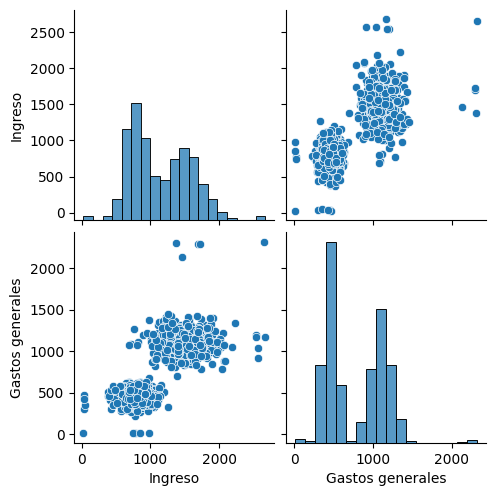

In [10]:
#sns.pairplot(internet[[columnas]])
sns.pairplot(internet[["Ingreso", "Gastos generales"]])

Yo creo que las variables que van a estar relacionadas son :
El ingreso ocn gastos generales
El ingreso con la accescibilidad a calle asfaltada
Gastos generales con familiares a cargo

#en diagonal me da los graficos de cada uno
#voy mirando en cada columna cuales serian sus outliers (tambien sirve para inspeccionar y caracterizar este grafico)
#aux: que esto no tenga forma de campana ya es un indicio de que no es normal, pero de todas formas para ver si es normal o no hay q hacer test de normalidad que hicimos anteriormente
sns.pairplot(internet[[columnas])

a)aca inspecciono y caracterizo

In [11]:
#para inspeccionar:
 
# inspecciono ->que columnas q tipos de datos datos nulos
#nos dice nombre de las columnas
#de que tipo es cada columna:(int, float, object(cualquier cosa que no sea nro->es str en general))
#y dice cantidad de datos no nulos por columna(arriba dice rageindex:1000 entries(eso es cant de entradas,
#  ese nro -datos no nulos, me da datos nulos por columna))
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               1013 non-null   int64  
 1   Nombre                           1013 non-null   object 
 2   Apellido                         1013 non-null   object 
 3   Ingreso                          989 non-null    float64
 4   Gastos generales                 989 non-null    float64
 5   Familiares a cargo               1013 non-null   bool   
 6   Accesibilidad a calle asfaltada  1013 non-null   bool   
 7   Otra empresa                     1013 non-null   bool   
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 42.7+ KB


<AxesSubplot: >

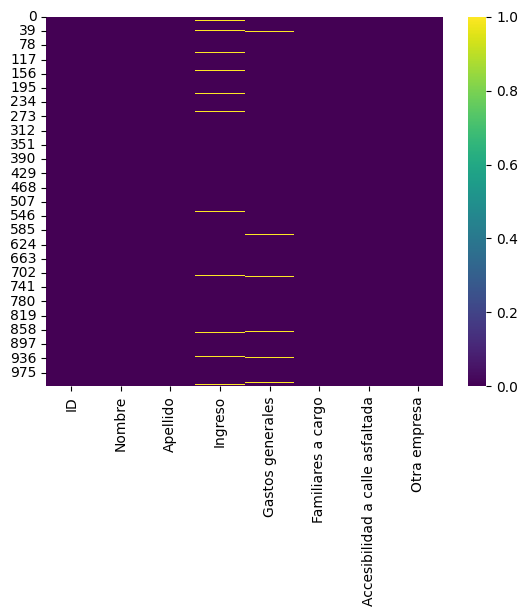

In [12]:
#auxiliar->hago grafico para ver datos nulos:

#inspección de los datos de forma visual
#Grafico para saber donde estan los datos nulos en q columna y en que fila
#->lineas amarillas muestran los datos nulos con respecto a datos totales
sns.heatmap(internet.isnull(), cmap='viridis') #Aux: (nombre de df.isnull(), cmap:color

In [13]:
#para caracterizarlo estadisticamente:

#muestra para cada columna numerica, cantidad, media, desvio estandar, min, max, los quartiles
internet.describe()
#viendo media y mediana no podemos asegurar si es o no normal, para esto hay que hacer test de normalidad


,ID,Ingreso,Gastos generales
count,1013.000000,989.000000,989.000000
mean,497.454097,1138.740576,777.404702
std,288.968622,432.163759,362.098822
min,1.000000,26.500000,12.620000
25%,247.000000,771.060000,445.790000
50%,496.000000,1048.480000,618.710000
75%,747.000000,1498.870000,1098.650000
max,1000.000000,2672.670000,2318.530000


d) Proponer un número de clusters (k) más apropiado, validarlo de forma gráfica. 

ACA VOY A RESOLVER TODO EL PUNTO D Y DEBAJO DEL PUNTO D, RESUELVO EL PUNTO C

In [14]:
#para ver si es normal o no, hago un test de normalidad->test de shapiro 
#w:valor estadistico, p:valor p-value->si es mayor a 0.05 nuestra distribucion es normal y si es menor a 0.05 no es normal

def verificacion_de_medias(lista):
    test={}
    for columna in lista:
        w, p =stats.shapiro(internet[columna].dropna()) #Pvalue da 1 si esa columna tiene datos nulos, por eso dentro de esa funcion ademas eliminas los nulos
        test[columna]=p
    return test

verificacion_de_medias(columnas) 


#nos devuelve nros mucho mas chicos que 0.05, por lo tanto no son normales

{'Ingreso': 1.4977513182547376e-16, 'Gastos generales': 5.8741483453252786e-27}

In [15]:
#para los outliers: (outliers:son los datos que estan lejos de la curva que representa mi distribucion)
#auxiliar para ver q valor da:
internet[["Ingreso", "Gastos generales"]].quantile(0.05).to_dict() #vemos los quantiles->quantil es una forma de separar una distribucion en partes, en este caso seria en n partes)
#si veo distribucion que tiene outliers ya sea al principio o al final o en ambos, los debo eliminar a esos datos que sobran 
#aca estoy tomando el 5% de mi distribucion de todas las columnas que me importa analizar (parte de distribucion que puede estar lejos y no me importaria) 

#(aux:por ej el quartil se separa en 4 partes(25%, 50%, 75% y 100%)

{'Ingreso': 595.02, 'Gastos generales': 346.73199999999997}

In [16]:
datos=internet[["Ingreso", "Gastos generales"]]

In [17]:
#para eliminar los outliers hago esto:
#esto lo hago tal cual y con estas mismas proporciones (0.95 y 0.05) para TODAS las columnas numericas -> en este caso solo lo hice para la columna "ingreso"
Cs1=datos["Ingreso"].quantile(0.95) #cuantil superior ->muestra 95% de mi distribucion
Ci1=datos["Gastos generales"].quantile(0.05) #cuantil inferior ->muestra el 5% de mi distribucion

Cs2=datos["Ingreso"].quantile(0.95) #cuantil superior ->muestra 95% de mi distribucion
Ci2=datos["Gastos generales"].quantile(0.05) #cuantil inferior ->muestra el 5% de mi distribucion
datos1=datos[(datos["Ingreso"]>=Ci1) & (datos["Ingreso"]<=Cs1) & (datos["Gastos generales"]>=Ci2) & (datos["Gastos generales"]<=Cs2)]#aca filtro para quedarme solo con los datos que estan entre el cuantil inferior y superior
#filtro en base a estos nros->en mis datos yo quiero que en columna "ingreso" mis datos sean mayores a 5% y menores a 95%
#todos los q estan mas alla o menos los tendremos que borrar

datos1

,Ingreso,Gastos generales
1,723.06,475.84
2,692.55,410.67
3,815.42,403.88
4,672.00,504.42
5,804.80,391.03
...,...,...
1005,1319.32,1345.50
1006,1443.28,854.31
1010,1407.65,1066.44
1011,1724.77,1079.90


In [18]:
#ahora a ese df que me quedo con los datos que no tienen outliers, ya guardado en una nueva variable "datos1"
#le voy a eliminar los datos duplicados :
datos2=datos1.drop_duplicates().reset_index(drop=True) #reseteo indices para que quede mas prolijo
datos2

,Ingreso,Gastos generales
0,723.06,475.84
1,692.55,410.67
2,815.42,403.88
3,672.00,504.42
4,804.80,391.03
...,...,...
842,1319.32,1345.50
843,1443.28,854.31
844,1407.65,1066.44
845,1724.77,1079.90


In [19]:
#en cuanto a la limpieza de datos nulos:

#para eliminar los datos nulos:
##datos3 = datos2.dropna()
#si son relativamente pocos los datos nulos los puedo eliminar con el dropna()->elimina nulos y en la fila donde hay un dato nulo->me borra toda esa fila
##datos3 =dato2.fillna().mean()
#si son muchos los datos nulos los elimina con el fillna().mean()->elimina los nulos y los valores restantes de esa fila los reemplaza por la media de esa columna

#aux:
#es lo mismo que hacer esto:
##datos.dropna(inplace=True) #inplace=True:para que se eliminen los duplicados en la misma lista
##datos.fillna(datos.mean(), inplace=True) #inplace=True:para que se eliminen los duplicados en la misma lista

#aux:si quisieras borrar solo datos nulos deuna columna en particular:
##datos_sin_nulos_de_ingreso=datos["Ingreso"].dropna() ->pero en este ej no sirve hacer esto (dado que yo necesito ver la comparacion de todo con todo, no podes comparar nro contra nada)
##datos_sin_nulos_de_ingreso=datos.fillna(datos["Ingreso"].mean())

In [20]:
##aux:en este caso pocentaje de datos nulos, es bajo en general, por lo que vimos en el grafico y cuando inspeccionamos el df por ende los elimino con el dropna() borrando ademas la fila donde hay un dato nulo
datos3 = datos2.dropna().reset_index(drop=True) #reseteo indices para que quede mas prolijo
datos3

,Ingreso,Gastos generales
0,723.06,475.84
1,692.55,410.67
2,815.42,403.88
3,672.00,504.42
4,804.80,391.03
...,...,...
842,1319.32,1345.50
843,1443.28,854.31
844,1407.65,1066.44
845,1724.77,1079.90


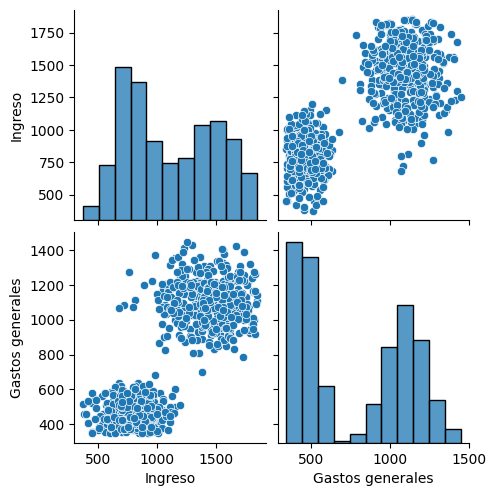

In [21]:
#grafico con las 3 anomalias ya limpiadas
sns.pairplot(datos3)

In [22]:
#escalo y normalizo
scaler=StandardScaler() #instancio el objeto
datos_escaleado=scaler.fit_transform(datos3[columnas])
datos_escaleado

array([[-1.03403721, -0.91698833],
       [-1.11459047, -1.11146607],
       [-0.79018604, -1.13172852],
       ...,
       [ 0.77343433,  0.84545684],
       [ 1.61070243,  0.88562364],
       [ 0.24874244,  0.32919708]])

In [23]:
def inercias_por_k(df_escalado):
  inercias = {}
  for i in range(1,11):
      kmeans = KMeans(n_clusters = i, init="random", n_init=10, max_iter=300, random_state=123457)
      kmeans.fit(df_escalado)
      inercias[i] = kmeans.inertia_
  return inercias


inercias =inercias_por_k(datos_escaleado)
inercias

{1: 1694.0,
 2: 278.33482510463097,
 3: 187.4112374317745,
 4: 147.01899068626045,
 5: 121.67721528166993,
 6: 101.88514175131209,
 7: 91.84938493907643,
 8: 81.00951890859376,
 9: 73.03765677561572,
 10: 68.70433873525}

In [24]:
#hago grafico del codo
df_inercias=pd.DataFrame(inercias.items(), columns=["K", "inercia"])

<AxesSubplot: xlabel='K', ylabel='inercia'>

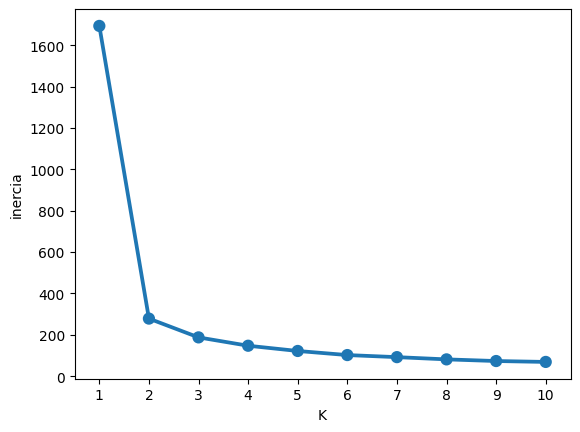

In [25]:
sns.pointplot(data= df_inercias, x="K", y="inercia")

aca en el grafico del codo se puede ver que el quiebre esta en k=2

In [26]:
k=2
kmeans = KMeans(n_clusters= k, init="random", n_init=10, max_iter=300, random_state=1234567)
kmeans.fit(datos_escaleado)

KMeans(init='random', n_clusters=2, random_state=1234567)

<AxesSubplot: >

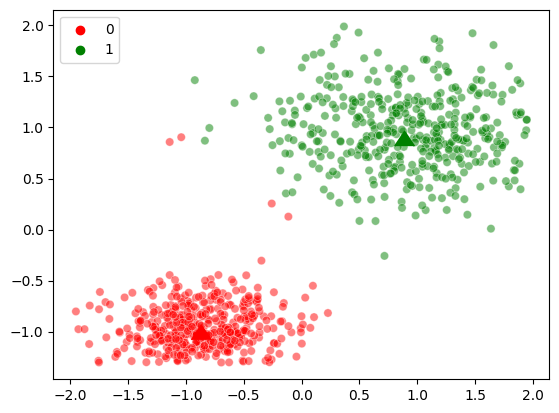

In [27]:
colores = ["red", "green"]
sns.scatterplot(x = datos_escaleado[:,0], y = datos_escaleado[:, 1], hue = kmeans.labels_, palette = colores, alpha = 0.5)
sns.scatterplot(x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1], zorder = 10, palette = colores, hue = [0, 1], legend = False, marker=6, s=200)

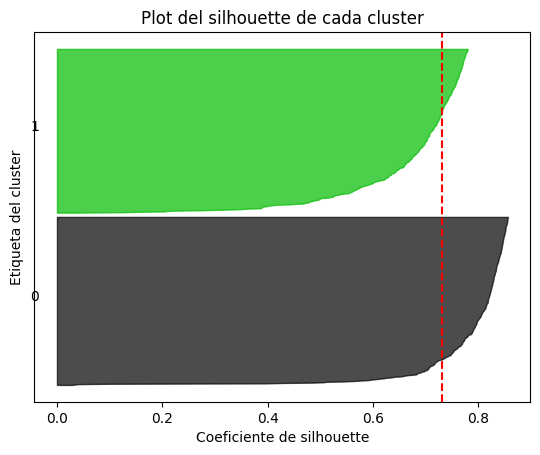

In [28]:
silhouette_avg=silhouette_score(datos_escaleado, kmeans.labels_)
sample_silhouette_values= silhouette_samples(datos_escaleado, kmeans.labels_)



def graficarSilhouette (k, labels, sample_silhouette_values, silhouette_avg):
  fig, ax1 = plt.subplots(1, 1)
  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = \
          sample_silhouette_values[labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10

  ax1.set_title("Plot del silhouette de cada cluster")
  ax1.set_xlabel("Coeficiente de silhouette")
  ax1.set_ylabel("Etiqueta del cluster")
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([])

graficarSilhouette (k, kmeans.labels_, sample_silhouette_values, silhouette_avg)


para evaluar :
me muestra los 2 grupos(0 y 1), veo que no hay datos que sean negativos o tiendan a valores bajos, casi todos tienden a 1. linea roja punteada->idealmente ptos deben pasar esa linea y la pasan
por ende nos dice que es confiable, se separaron bien los grupos

c) Usando un k=3 realizá el agrupamiento de los datos. Analizar y evaluar si el proceso de clustering fue correcto. 

In [29]:
k=3
kmeans = KMeans(n_clusters= k, init="random", n_init=10, max_iter=300, random_state=1234567)
kmeans.fit(datos_escaleado)

KMeans(init='random', n_clusters=3, random_state=1234567)

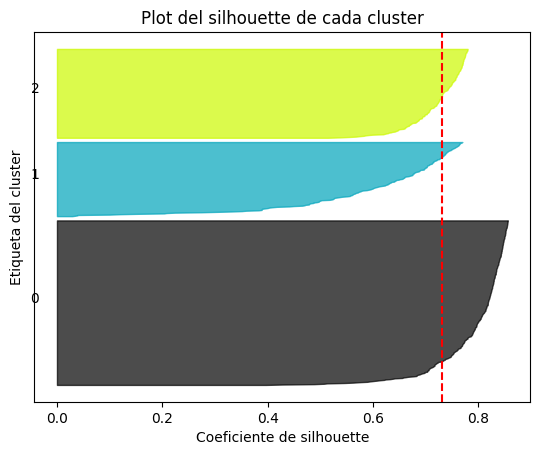

In [30]:
def graficarSilhouette (k, labels, sample_silhouette_values, silhouette_avg):
  fig, ax1 = plt.subplots(1, 1)
  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = \
          sample_silhouette_values[labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10

  ax1.set_title("Plot del silhouette de cada cluster")
  ax1.set_xlabel("Coeficiente de silhouette")
  ax1.set_ylabel("Etiqueta del cluster")
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([])

graficarSilhouette (k, kmeans.labels_, sample_silhouette_values, silhouette_avg)


para evaluar :
me muestra los 3 grupos(0, 1 y 2), veo que no hay datos que sean negativos o tiendan a valores bajos, casi todos tienden a 1. linea roja punteada->idealmente ptos deben pasar esa linea y la pasan
por ende nos dice que es confiable, se separaron bien los grupos

e) ¿Qué conclusión podés sacar de [este gráfico del codo](https://github.com/FundamentosInformaticaUCEMA/FI_Parcial2_2022_T1/blob/main/recursos/codo.jpg)?

In [32]:
#no hay un quiebre por ende no puedo saber cual es el kmean